In [1]:
import anndata as ad
import loompy
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy.api as sc
import warnings
warnings.filterwarnings('ignore')

/home/arnav/.miniconda3/lib/python3.7/site-packages/anndata/base.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/arnav/.miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Initial setup
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(dpi=100,
                     dpi_save=300,
                     vector_friendly=False,
                     transparent=True,
                     format="pdf")
sc.logging.print_versions()

# Output-specific variables
out_stem = "../output_and_analysis/reanalysis/Ctx-HyPB"
results_file = out_stem + ".h5ad"
raw_file = out_stem + "_raw.h5ad"

scanpy==1.3.7 anndata==0.6.18 numpy==1.17.2 scipy==1.2.1 pandas==1.0.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
sc.logging.print_memory_usage()

Memory usage: current 0.24 GB, difference +0.24 GB


### Preprocessing

In [4]:
# Helper function to process batches
def preprocess_batch(path, barcode_file = None):
    adata = sc.read(path + "matrix.mtx", cache = True).T
    adata.var_names = pd.read_csv(path + 'genes.tsv', header=None, sep='\t')[1]
    adata.obs_names = pd.read_csv(path + 'barcodes.tsv', header=None)[0]
    adata.var_names_make_unique()
    if barcode_file:
        barcodes = [line.strip() for line in open(barcode_file, 'r')]
        adata = adata[barcodes, :]
    return adata

In [5]:
%%time
# Load the libraries
batch_paths = ["mm-Pool1-Ctx-P14_S1_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool1-Ctx-P17_S2_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool1-Ctx-P23_S3_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool2-Ctx-P21-2A_S4_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool2-Ctx-P21-2B_S5_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool2-Ctx-P2-P28_S6_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool3-Ctx-P28-2A_S7_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool3-Ctx-P28-2B_S8_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",
               "mm-Pool3-Hp-P28_S9_map_cDNA_mm10/outs/filtered_gene_bc_matrices/mm10/",]
barcode_files = ["Pool1-Ctx-P14_S1_uniqBarcodes.txt",
                 "Pool1-Ctx-P17_S2_uniqBarcodes.txt",
                 "Pool1-Ctx-P23_S3_uniqBarcodes.txt",
                 "Pool2-Ctx-P21-2A_S4_uniqBarcodes.txt",
                 "Pool2-Ctx-P21-2B_S5_uniqBarcodes.txt",
                 "Pool2-Ctx-P2-P28_S6_uniqBarcodes.txt",
                 "Pool3-Ctx-P28-2A_S7_uniqBarcodes.txt",
                 "Pool3-Ctx-P28-2B_S8_uniqBarcodes.txt",
                 "Pool3-Hp-P28_S9_uniqBarcodes.txt"]
batch_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]
batches = [preprocess_batch(path, barcode_file = barcodes) for path, barcodes in zip(batch_paths, barcode_files)]

... reading from cache file ./cache/mm-Pool1-Ctx-P14_S1_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool1-Ctx-P17_S2_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool1-Ctx-P23_S3_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool2-Ctx-P21-2A_S4_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool2-Ctx-P21-2B_S5_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool2-Ctx-P2-P28_S6_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool3-Ctx-P28-2A_S7_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool3-Ctx-P28-2B_S8_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file ./cache/mm-Pool3-Hp-P28_S9_map_cDNA_mm10-outs-filtered_gene_bc_matrices-mm10-matrix.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


CPU times: user 24.4 s, sys: 3.05 s, total: 27.4 s
Wall time: 9.39 s


In [6]:
# Concatenate batches
raw_adata = ad.AnnData.concatenate(*batches, index_unique = None, batch_categories = batch_names)
# We can specify index_unique = None because we have prefiltered with barcode_files
# Store the original count values in .raw
raw_adata.raw = raw_adata

In [7]:
%%time
# Remove mitochondrial genes from the matrix
non_mito_genes = [name for name in raw_adata.var_names if not name.startswith('mt-')]
raw_adata = raw_adata[:, non_mito_genes]
# Find highly variable genes for dimensionality reduction and projection
sc.pp.filter_genes(raw_adata, min_counts=1)  # only consider genes with more than 1 count
sc.pp.normalize_per_cell(raw_adata)          # normalize with total UMI count per cell
filter_result = sc.pp.filter_genes_dispersion(raw_adata.X,
                                              flavor='cell_ranger',
                                              n_top_genes=1000,
                                              log=False)

filtered out 6034 genes that are detected in less than 1 counts
CPU times: user 26.9 s, sys: 4.78 s, total: 31.7 s
Wall time: 8.51 s


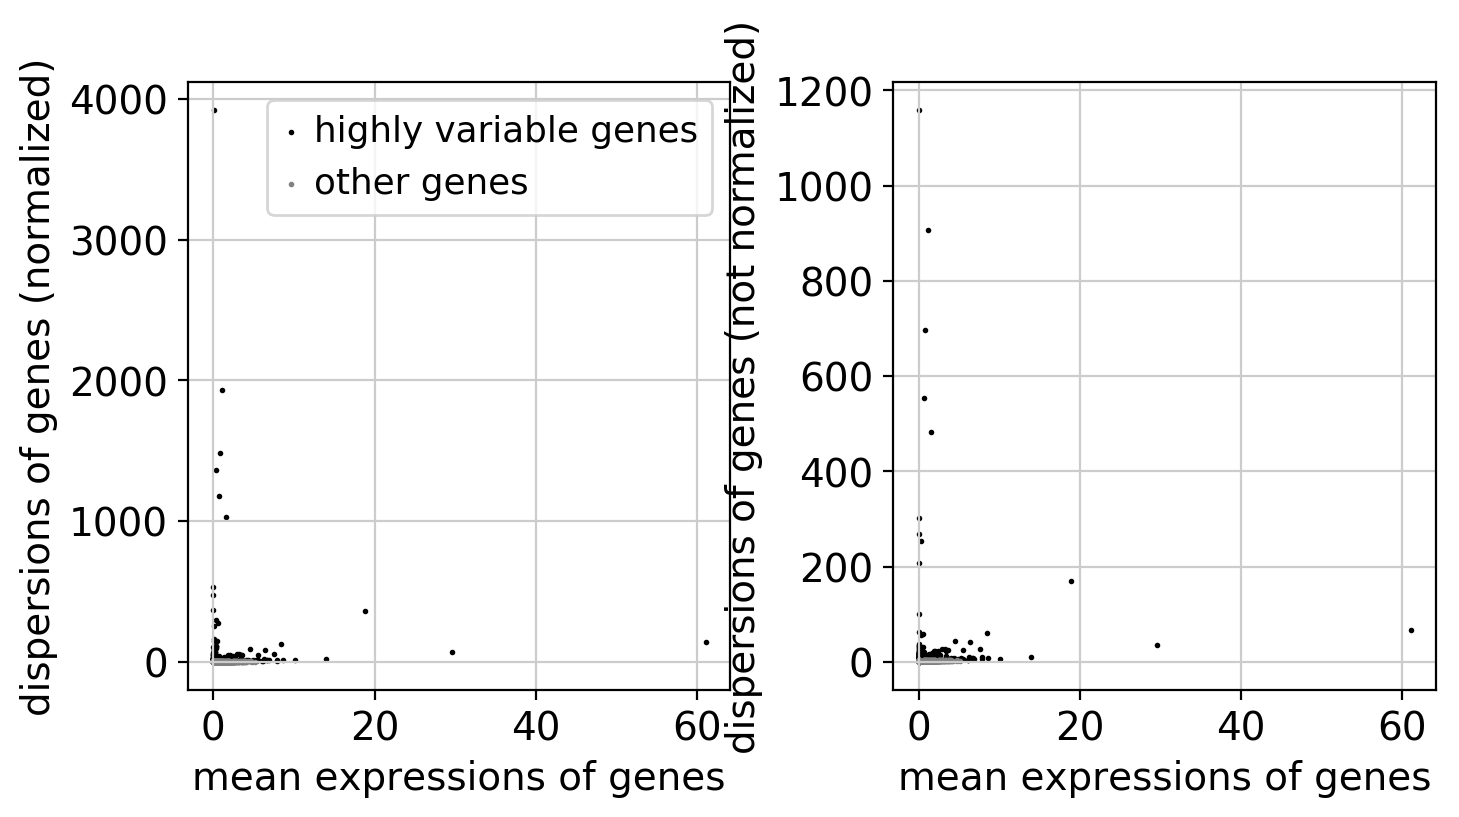

In [8]:
sc.pl.filter_genes_dispersion(filter_result, log=True)

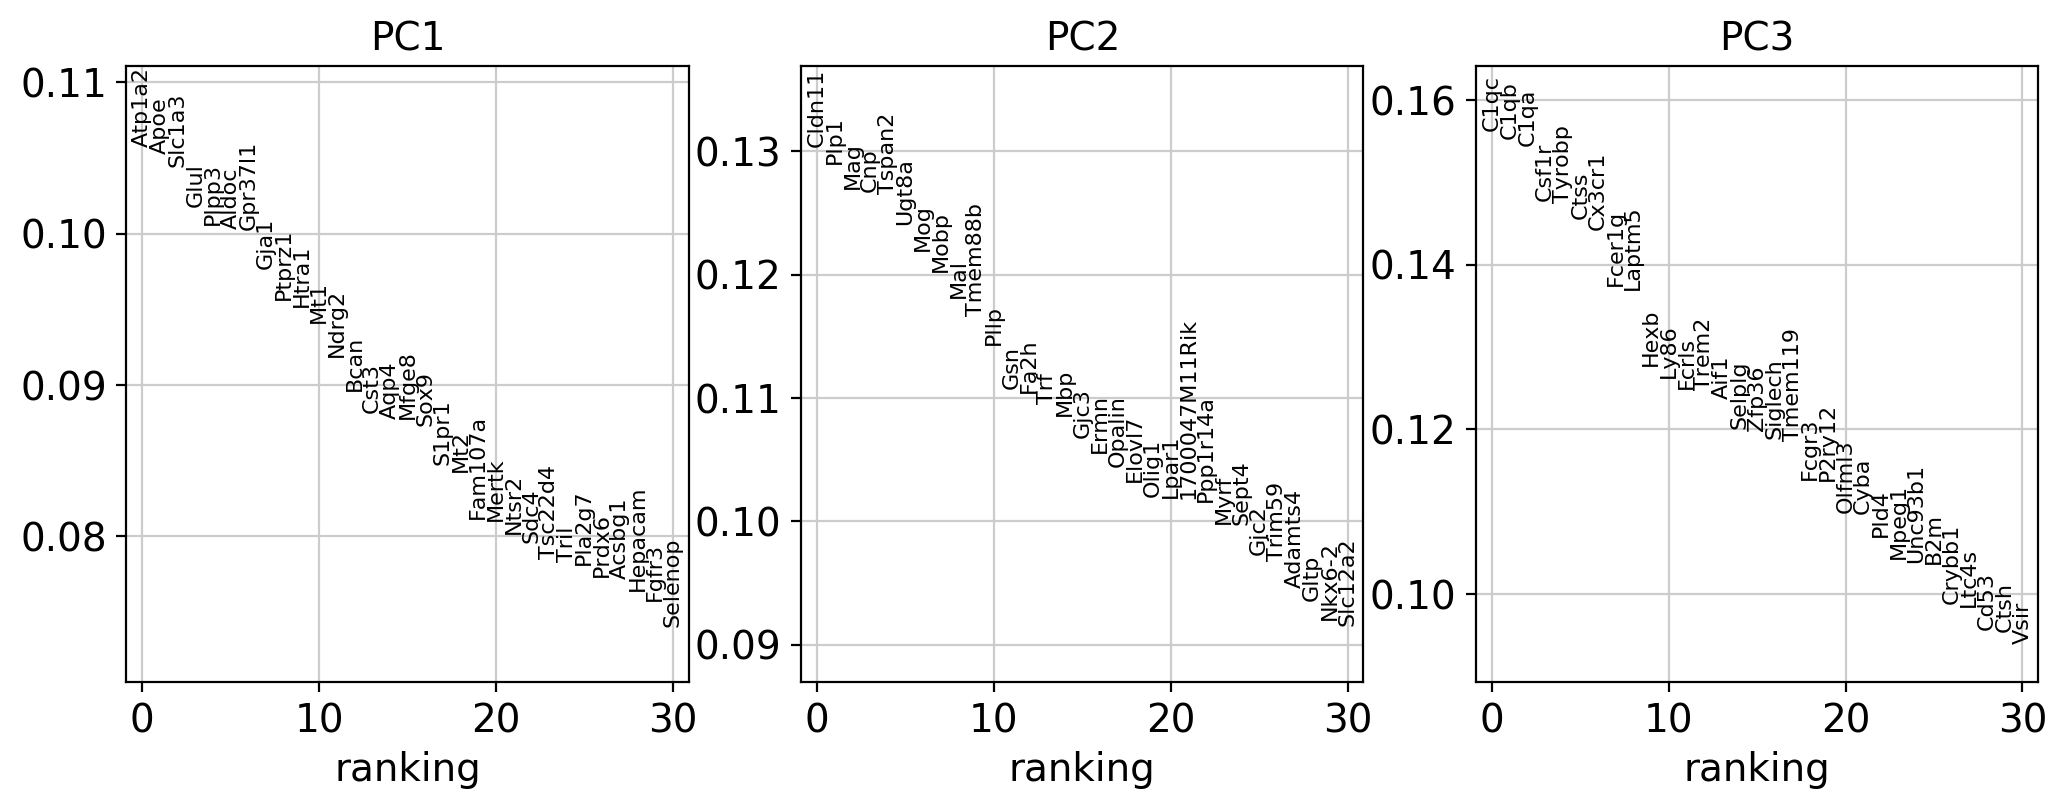

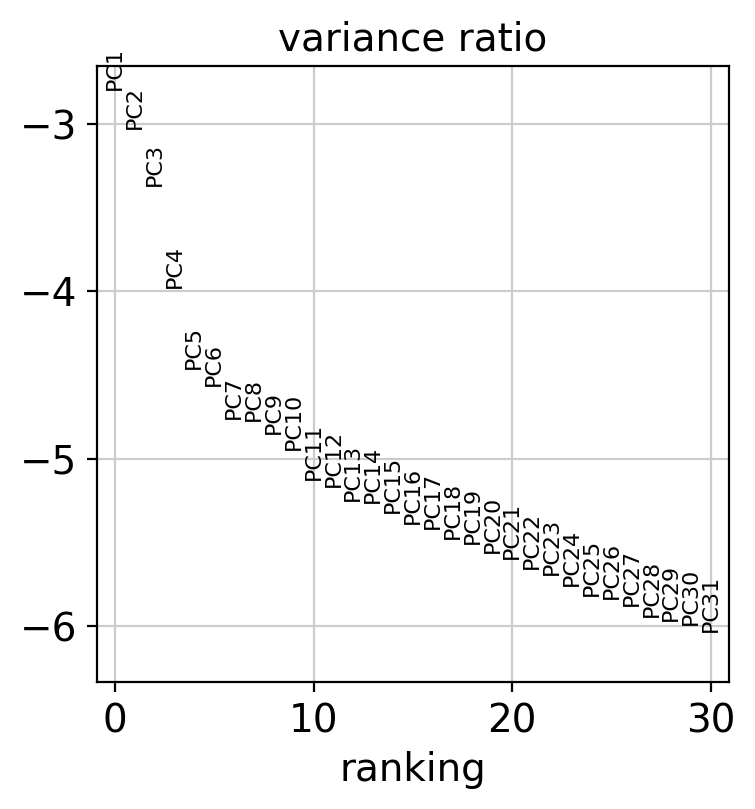

Memory usage: current 4.72 GB, difference +4.49 GB
CPU times: user 26.3 s, sys: 2.36 s, total: 28.6 s
Wall time: 4.53 s


In [9]:
%%time
# Reduce dimensions and project with highly variable genes
raw_umap = raw_adata[:, filter_result.gene_subset]  # filter genes
sc.pp.normalize_per_cell(raw_umap)  # need to redo normalization after filtering
sc.pp.log1p(raw_umap)  # log transform: X = log(X + 1)
sc.pp.scale(raw_umap)
# PCA. Visualizing variance ratios can help determine an appropriate number of PCs
npc = 50
sc.tl.pca(raw_umap, n_comps=npc, svd_solver="arpack")
sc.pl.pca_loadings(raw_umap)
sc.pl.pca_variance_ratio(raw_umap, log=True)
sc.logging.print_memory_usage()

In [10]:
%%time
# Calculate neighborhood graph
sc.pp.neighbors(raw_umap, n_neighbors=50, n_pcs = npc)
sc.logging.print_memory_usage()

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:35.29) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
Memory usage: current 4.74 GB, difference +0.02 GB
CPU times: user 55.1 s, sys: 6.68 s, total: 1min 1s
Wall time: 35.3 s


computing UMAP
    finished (0:01:06.48) --> added
    'X_umap', UMAP coordinates (adata.obsm)


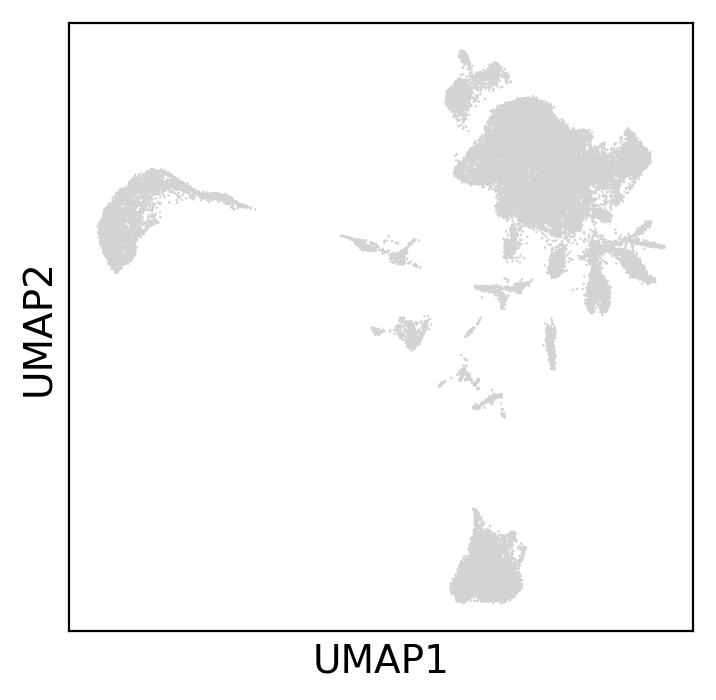

Memory usage: current 4.75 GB, difference +0.01 GB
CPU times: user 2min 4s, sys: 5.09 s, total: 2min 9s
Wall time: 1min 7s


In [11]:
%%time
# Create the projection
sc.tl.umap(raw_umap, min_dist=0.5) # 0.1 default from umap-learn, leads to tighter clusters
# Plot the projection
sc.pl.umap(raw_umap)
sc.logging.print_memory_usage()

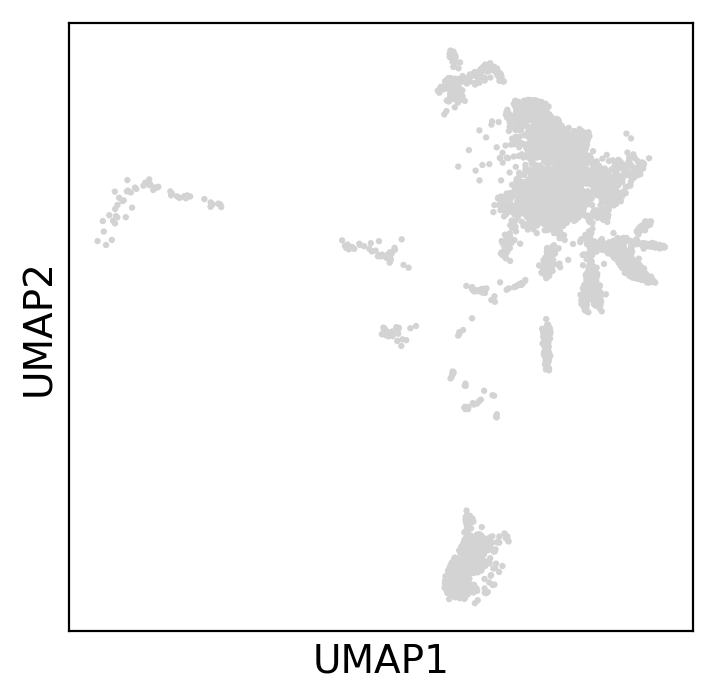

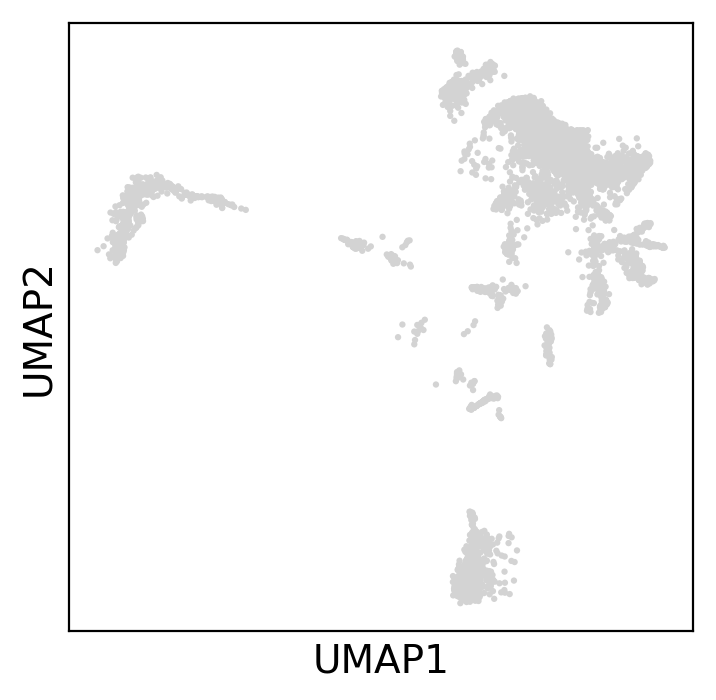

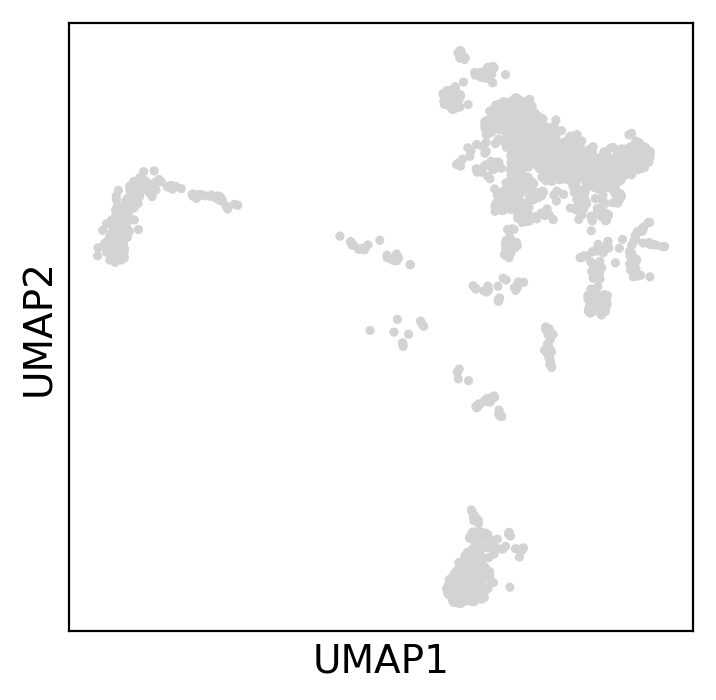

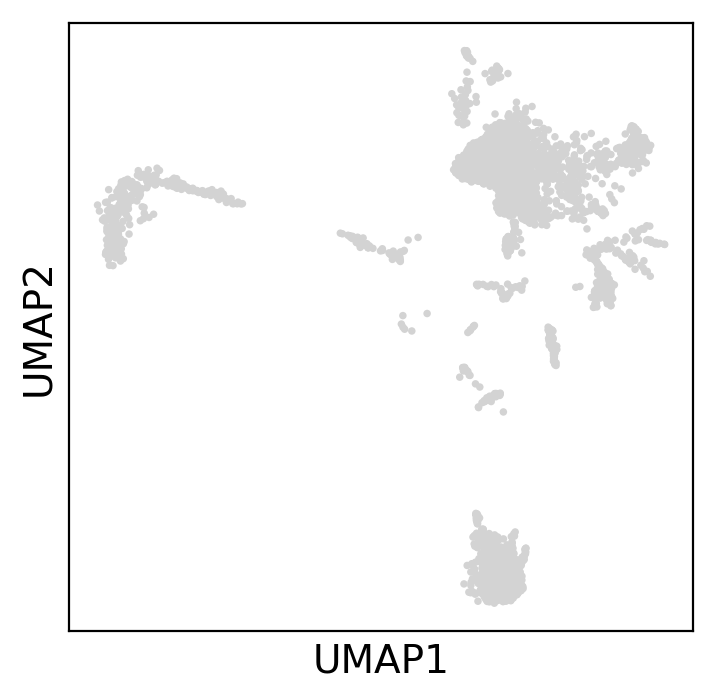

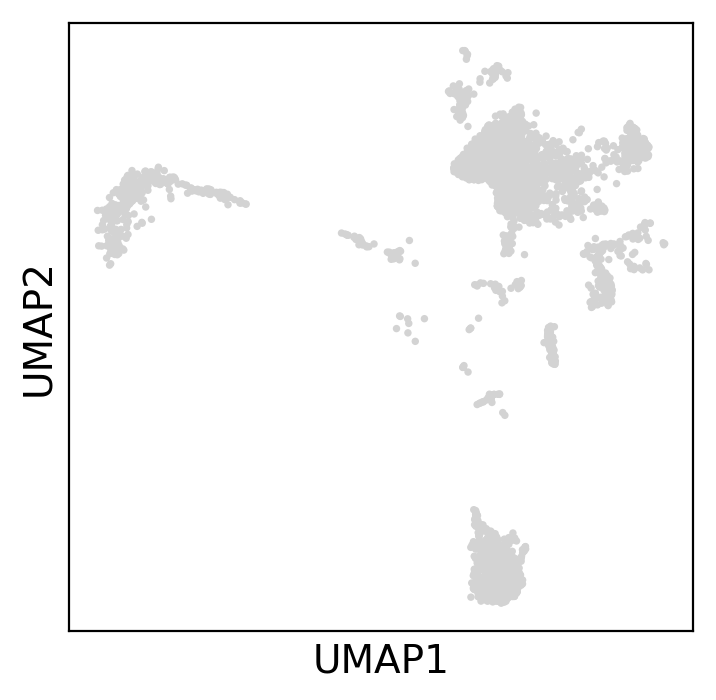

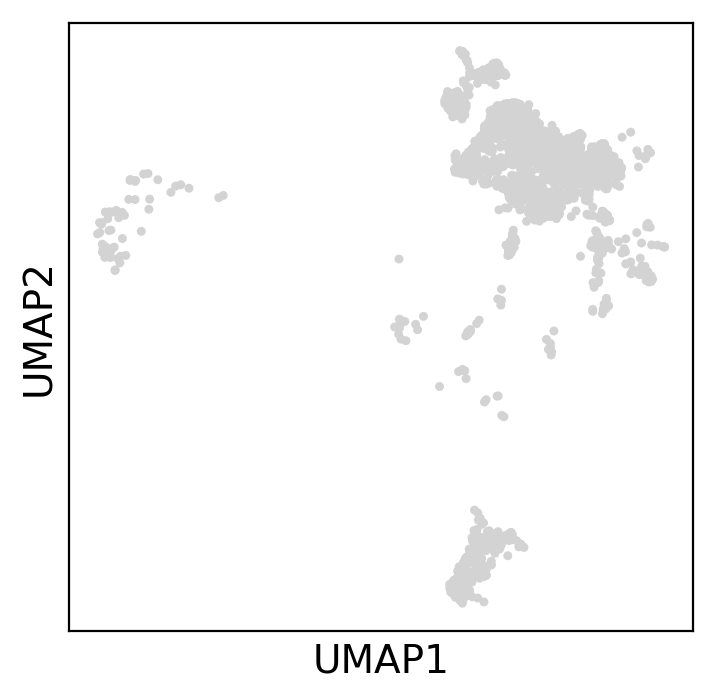

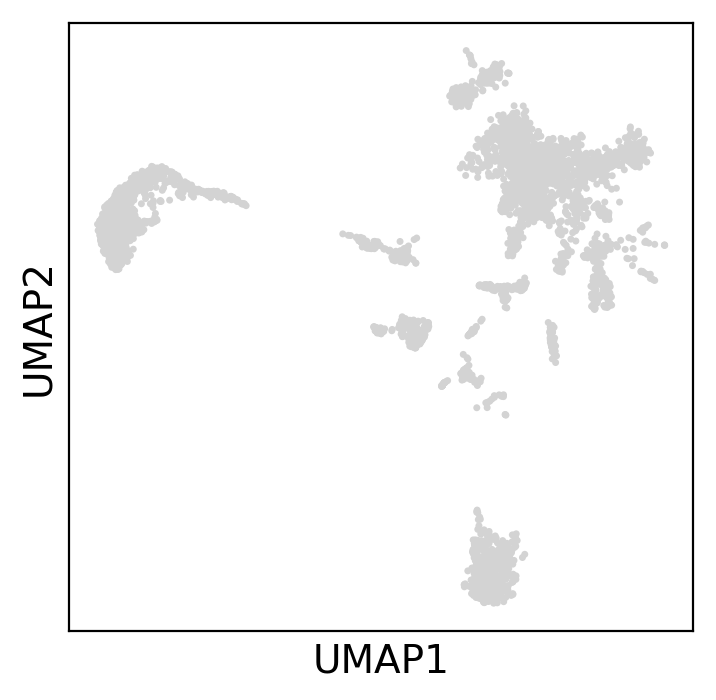

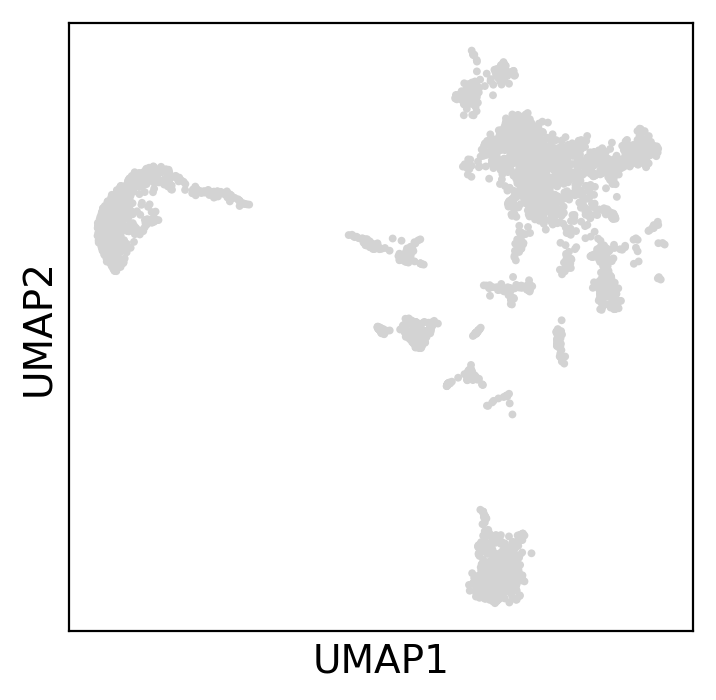

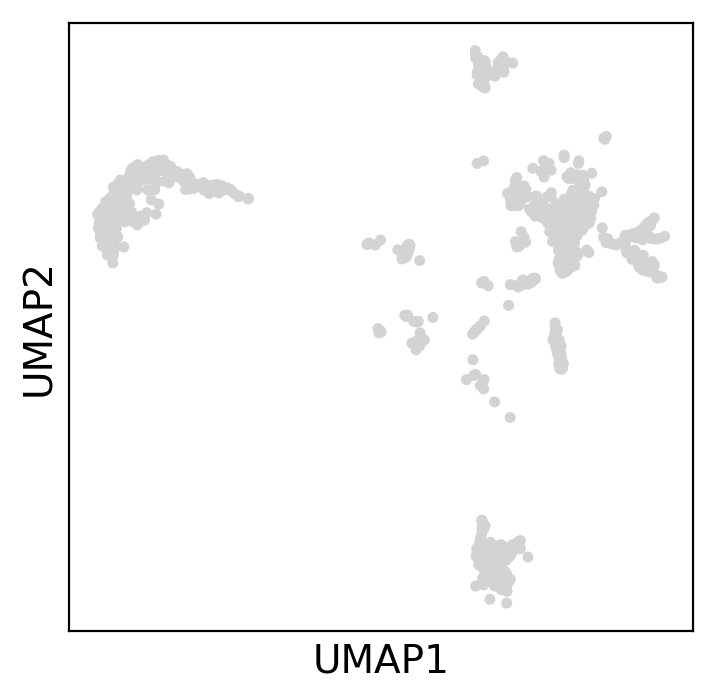

In [12]:
# Plot each batch individually (to visually check batch correction)
for batch in batch_names:
    batch_fig = sc.pl.umap(raw_umap[raw_umap.obs["batch"] == batch], show = False)
    batch_fig.figure.savefig(out_stem + "_batch{}.pdf".format(batch),
                             dpi = 300,
                             transparent = True,
                             bbox_inches = "tight")

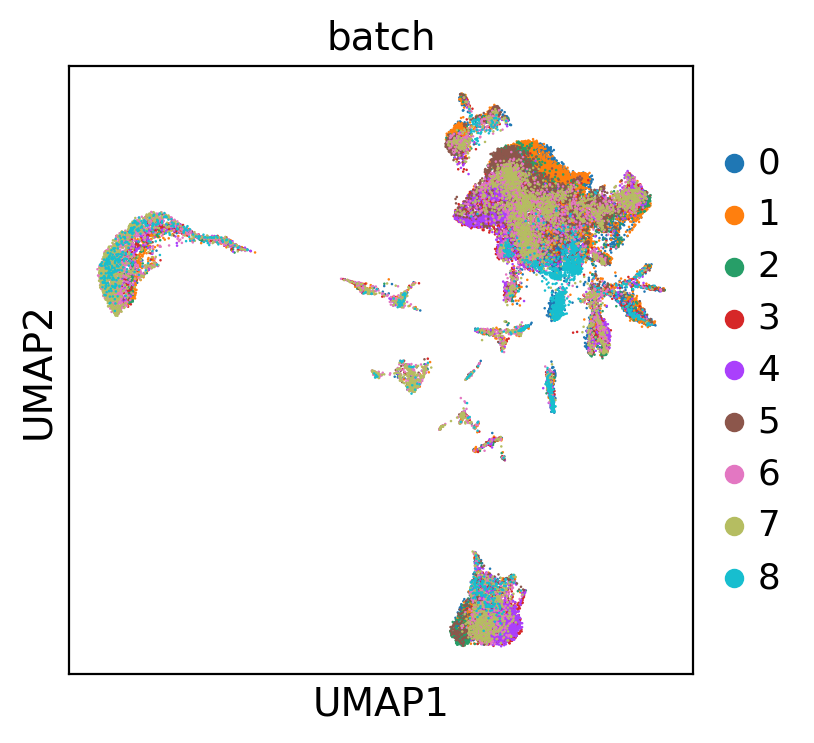

In [13]:
# Save clustering of the uncorrected batches
uncorrected_batch = sc.pl.umap(raw_umap,
                               color = "batch",
                               show = False)
uncorrected_batch.figure.savefig(out_stem + "_batches.pdf",
                                 dpi = 300,
                                 transparent = True,
                                 bbox_inches = "tight")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:20.39) --> found 18 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
Memory usage: current 4.76 GB, difference +0.00 GB


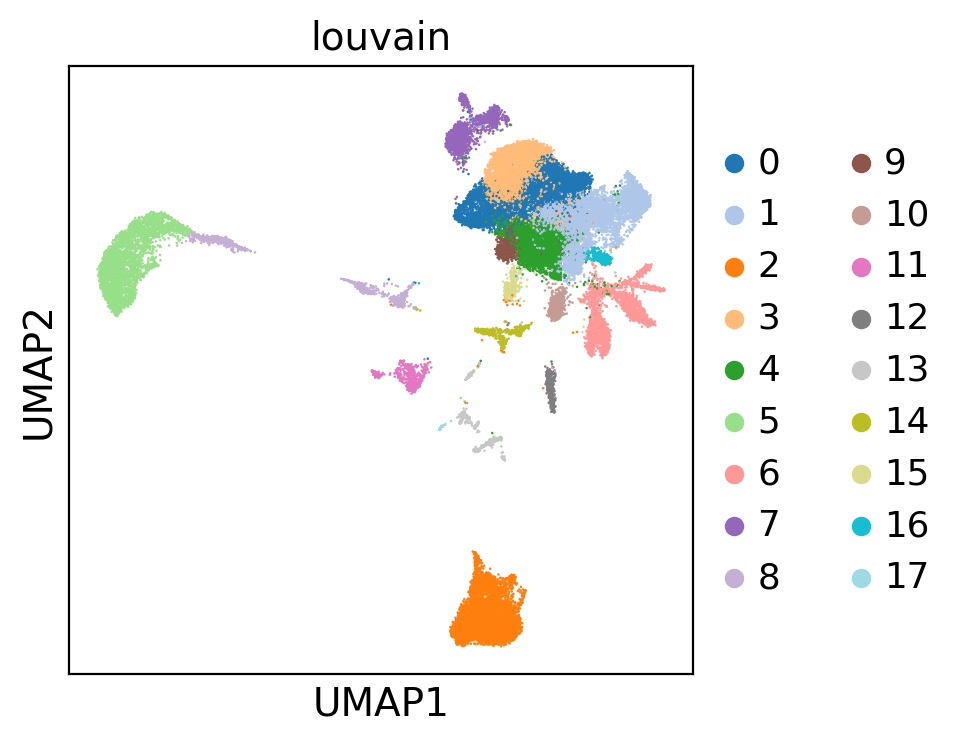

CPU times: user 24.5 s, sys: 549 ms, total: 25 s
Wall time: 21.6 s


In [14]:
%%time
# Find clusters (lower resolution results in fewer clusters)
# Needs to happen on the projection subset
sc.tl.louvain(raw_umap, resolution=0.55)
sc.logging.print_memory_usage()
sc.pl.umap(raw_umap, color = ["louvain"], palette="tab20")

In [15]:
# Save the projection to the original raw data structure
raw_adata.obsm = raw_umap.obsm
raw_adata.obs["louvain"] = raw_umap.obs["louvain"]
# Normalize and logarithmize data before saving
sc.pp.normalize_per_cell(raw_adata)
sc.pp.log1p(raw_adata)
# Save the raw data
raw_adata.write(results_file)

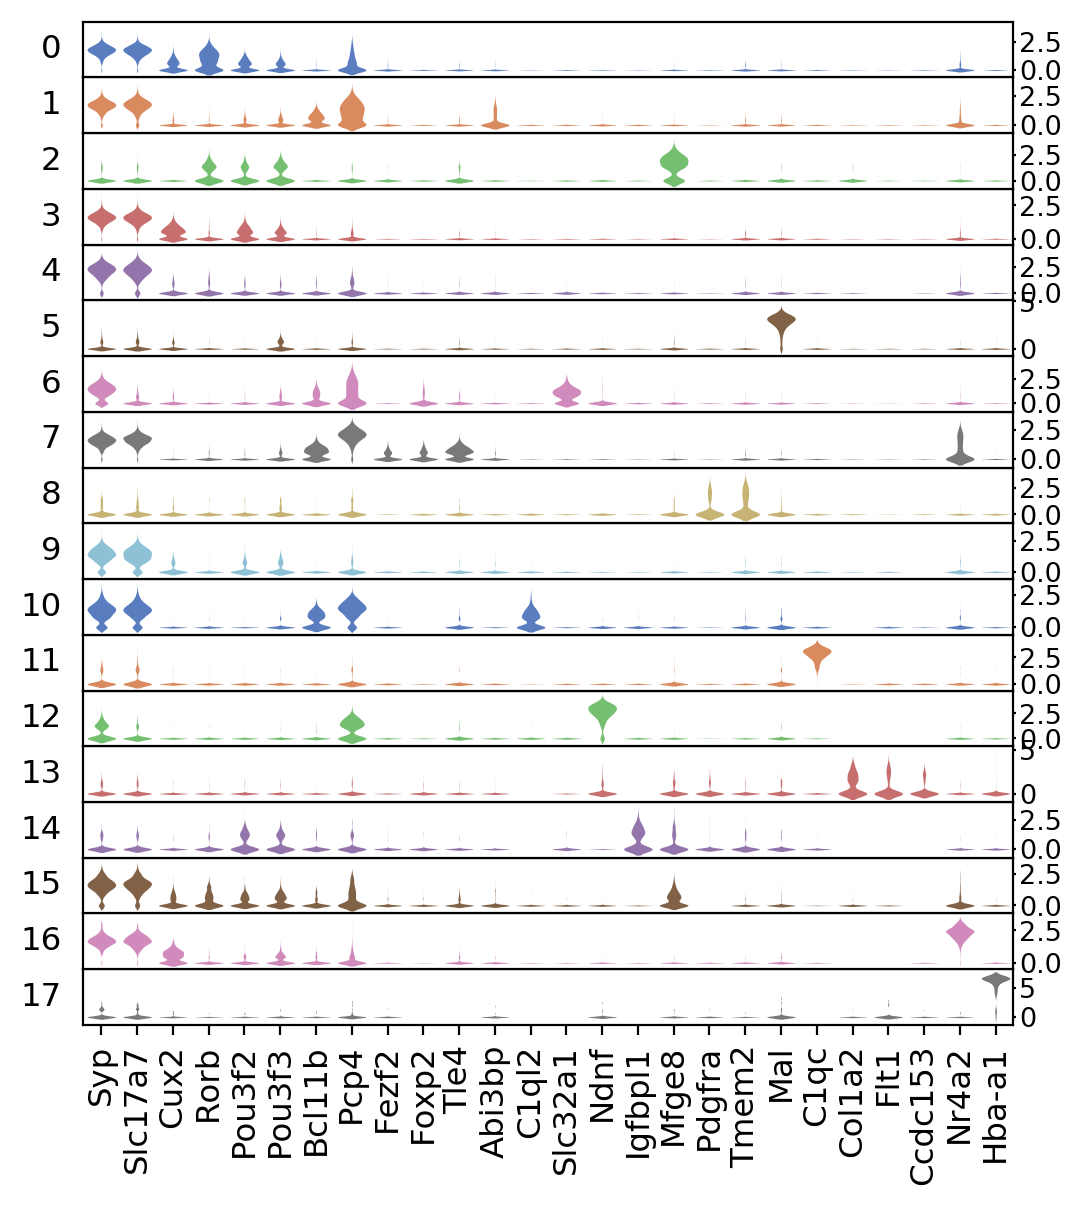

In [16]:
sc.pl.stacked_violin(raw_adata, 
                     ["Syp", "Slc17a7", "Cux2", 
                      "Rorb", "Pou3f2", "Pou3f3", 
                      "Bcl11b", "Pcp4", "Fezf2", 
                      "Foxp2", "Tle4", "Abi3bp", 
                      "C1ql2", "Slc32a1", "Ndnf", 
                      "Igfbpl1", "Mfge8", "Pdgfra", 
                      "Tmem2", "Mal", "C1qc", 
                      "Col1a2", "Flt1", "Ccdc153",
                      "Nr4a2", "Hba-a1"],
                     groupby="louvain",
                     bw = 0.3,
                     use_raw = False,
                     scale = "width",
                     linewidth = 0,)

ranking genes
    finished (0:00:32.55) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


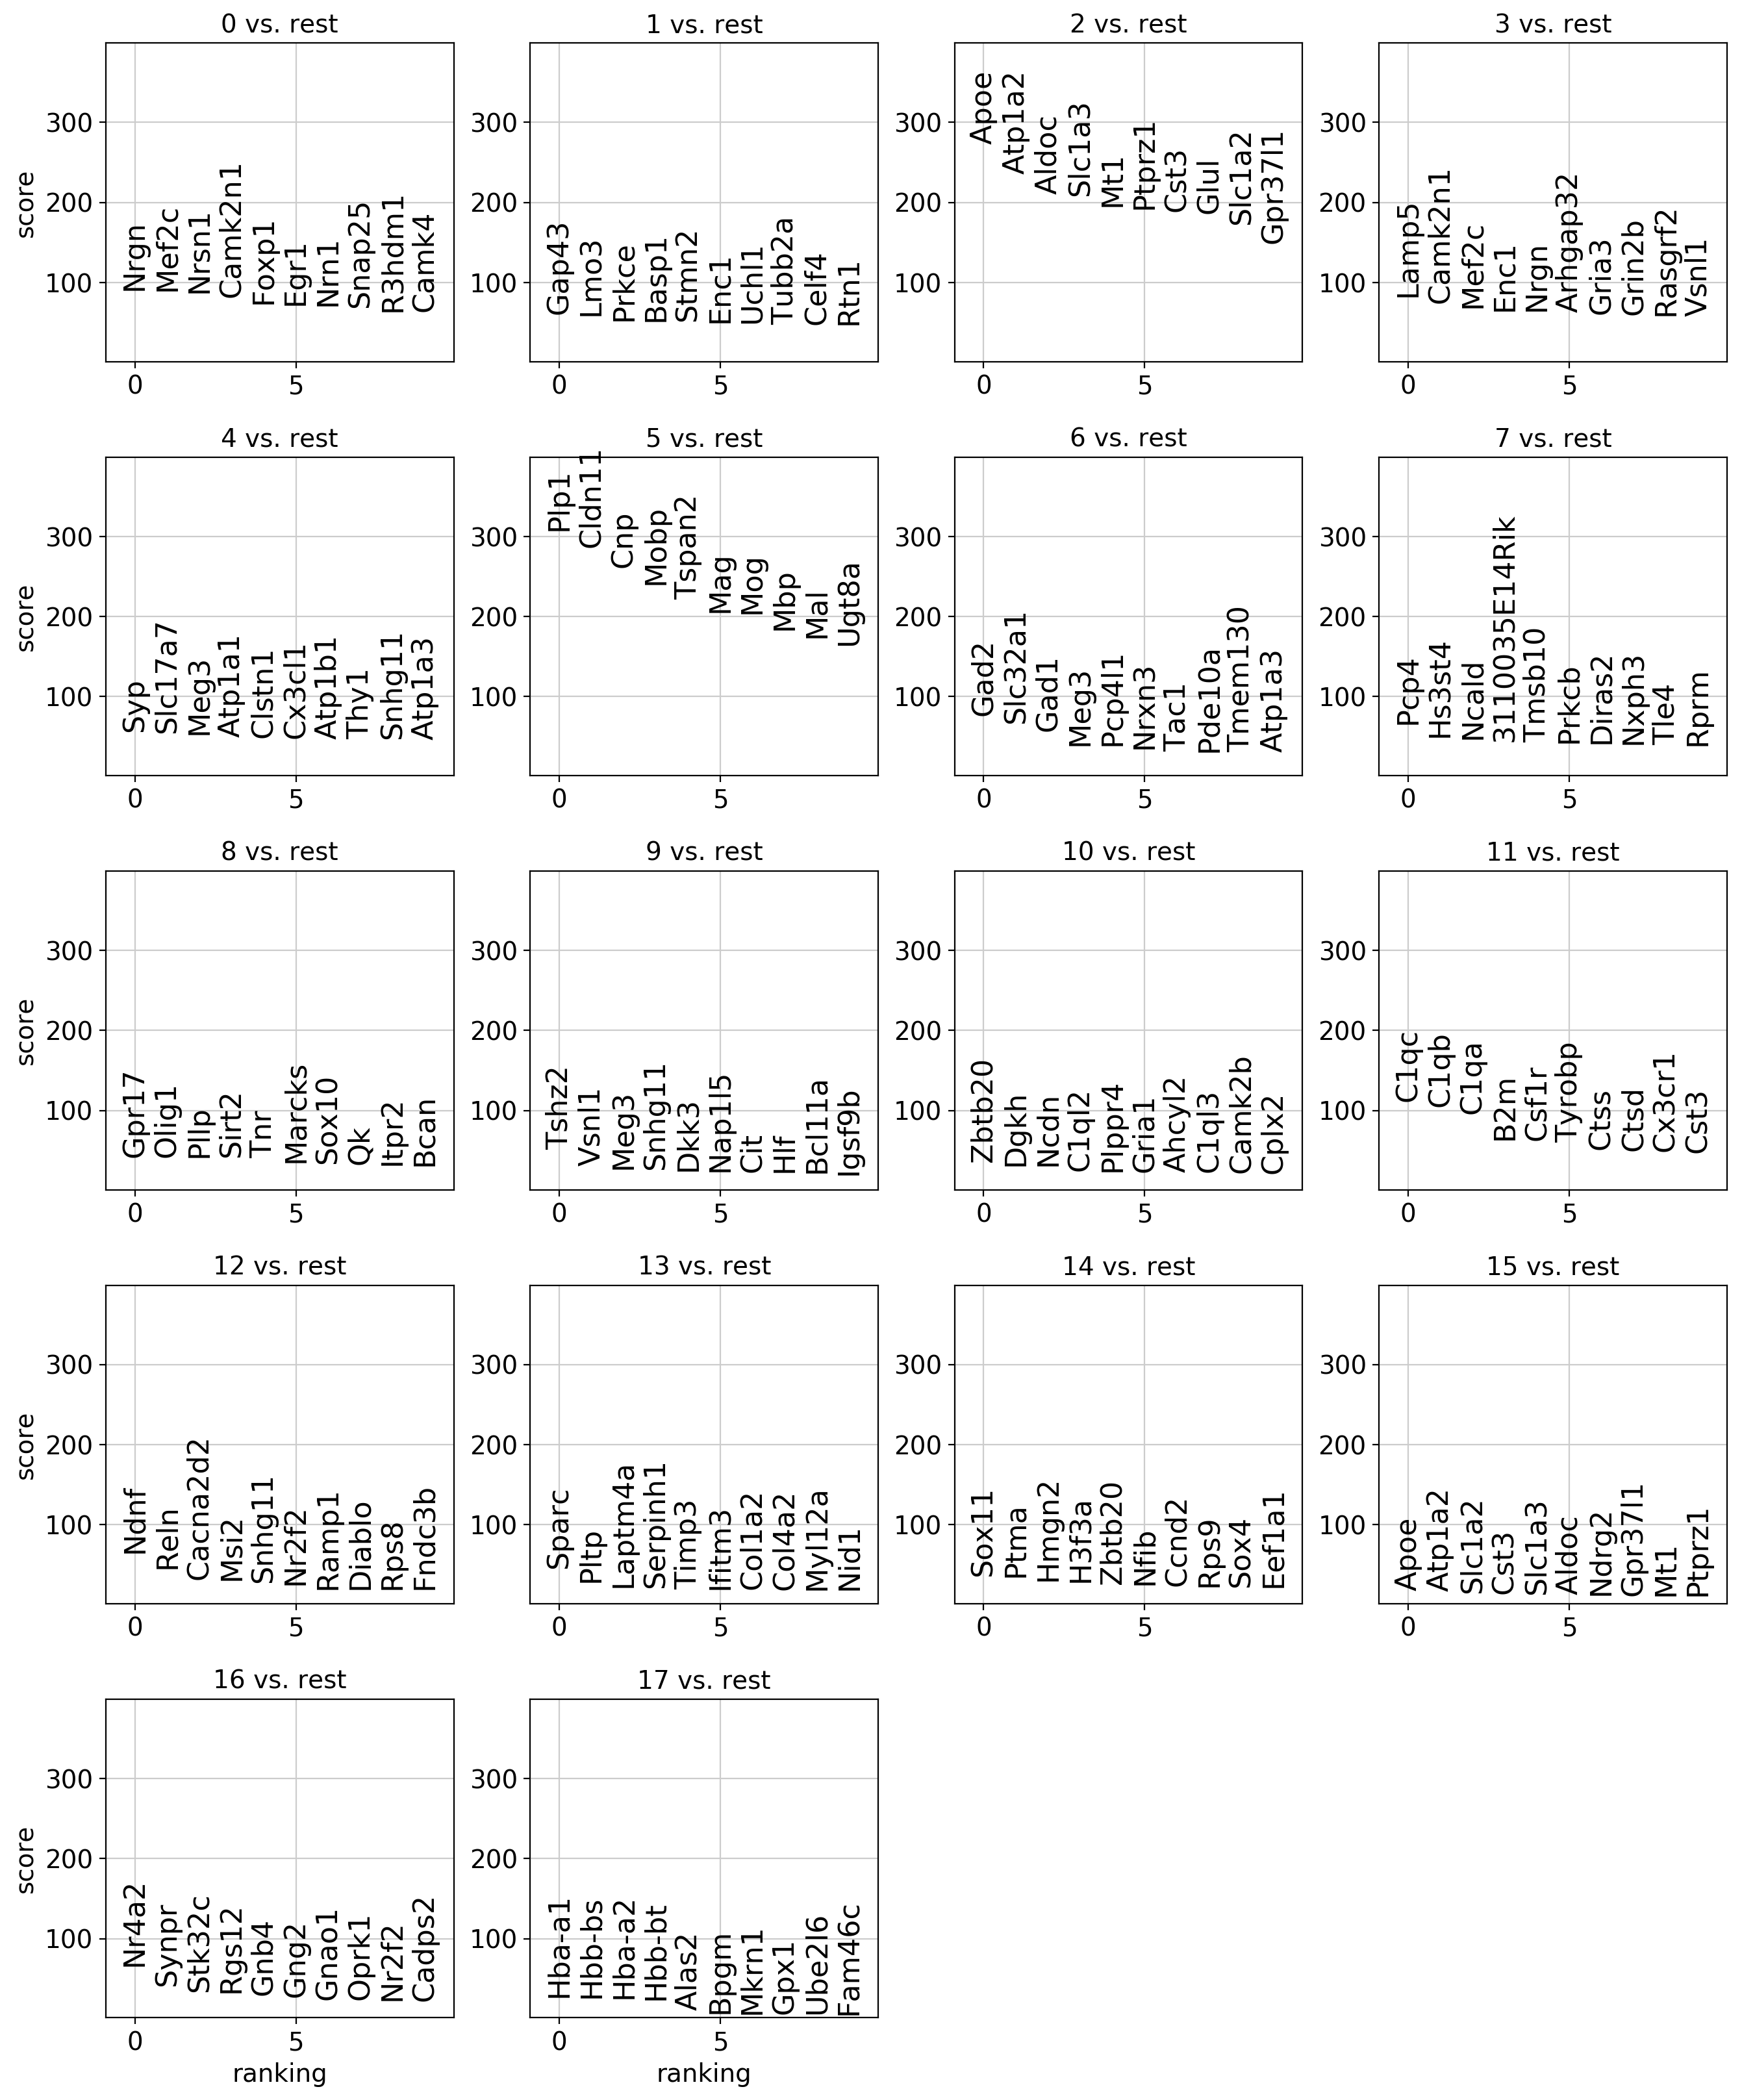

Memory usage: current 4.76 GB, difference +0.00 GB
CPU times: user 3min 8s, sys: 28 s, total: 3min 36s
Wall time: 37.8 s


In [17]:
%%time
# Find distinguishing genes
sc.tl.rank_genes_groups(raw_adata, "louvain", use_raw = False)
sc.pl.rank_genes_groups(raw_adata, n_genes=10, fontsize = 16)
sc.logging.print_memory_usage()

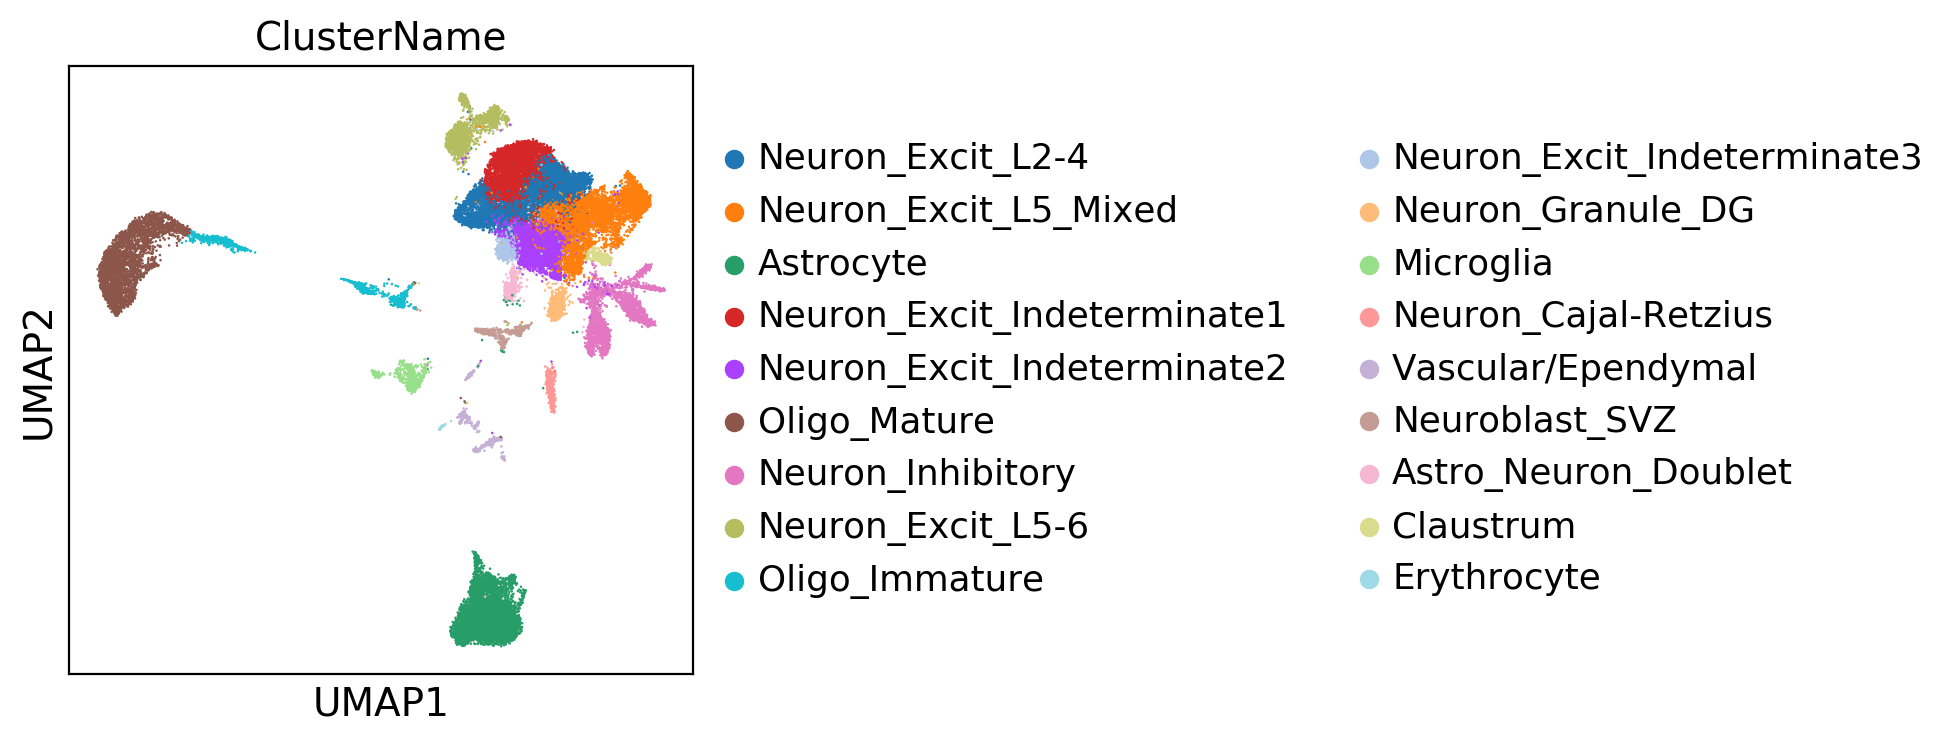

In [18]:
raw_adata.obs["ClusterID"] = raw_adata.obs["louvain"]
raw_adata.obs["ClusterName"] = raw_adata.obs["ClusterID"]
raw_adata.rename_categories("ClusterName",
                            ["Neuron_Excit_L2-4",
                             "Neuron_Excit_L5_Mixed",
                             "Astrocyte",
                             "Neuron_Excit_Indeterminate1",
                             "Neuron_Excit_Indeterminate2",
                             "Oligo_Mature",
                             "Neuron_Inhibitory",
                             "Neuron_Excit_L5-6",
                             "Oligo_Immature",
                             "Neuron_Excit_Indeterminate3",
                             "Neuron_Granule_DG",
                             "Microglia",
                             "Neuron_Cajal-Retzius",
                             "Vascular/Ependymal",
                             "Neuroblast_SVZ",
                             "Astro_Neuron_Doublet",
                             "Claustrum",
                             "Erythrocyte",
                            ])
raw_adata.rename_categories("batch",
                            ["Ctx-P14",
                             "Ctx-P17",
                             "Ctx-P23",
                             "Ctx-P21-2A",
                             "Ctx-P21-2B",
                             "Ctx-P2-P28",
                             "Ctx-P28-2A",
                             "Ctx-P28-2B",
                             "Hp-P28"])
clusters = sc.pl.umap(raw_adata, color = ["ClusterName"], show = False)
clusters.figure.savefig(out_stem + "_raw_clusters.pdf",
                        dpi = 300,
                        transparent = True,
                        bbox_inches = "tight")

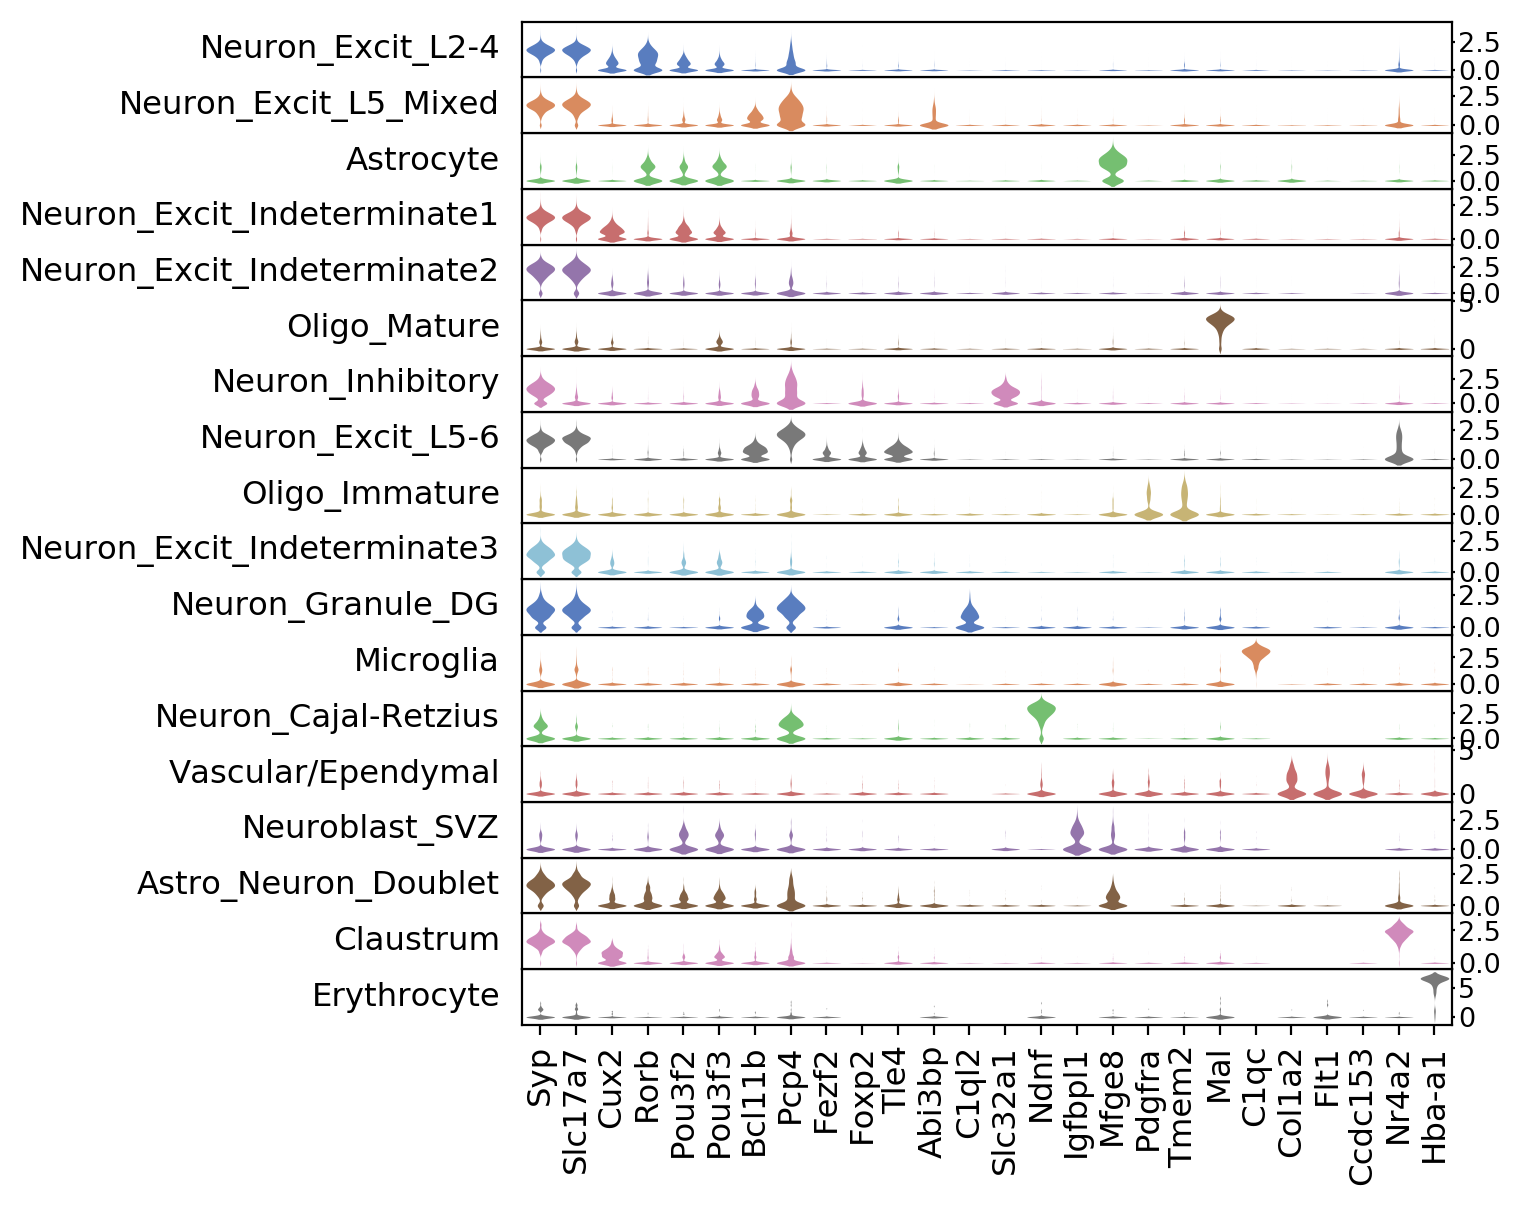

In [19]:
sc.pl.stacked_violin(raw_adata, 
                     ["Syp", "Slc17a7", "Cux2", 
                      "Rorb", "Pou3f2", "Pou3f3", 
                      "Bcl11b", "Pcp4", "Fezf2", 
                      "Foxp2", "Tle4", "Abi3bp", 
                      "C1ql2", "Slc32a1", "Ndnf", 
                      "Igfbpl1", "Mfge8", "Pdgfra", 
                      "Tmem2", "Mal", "C1qc", 
                      "Col1a2", "Flt1", "Ccdc153",
                      "Nr4a2", "Hba-a1"],
                     groupby="ClusterName",
                     bw = 0.3,
                     use_raw = False,
                     scale = "width",
                     linewidth = 0,)

In [20]:
# Helper function to write all important data to Loom file
# This attempts to adhere to the Loom 2.0 conventions described here:
# http://linnarssonlab.org/loompy/conventions/index.html
def scanpyToLoom(adata, loomFilename, sampleName):
    assert loomFilename.endswith(".loom")
    # Write loom file to disk first
    adata.write_loom(loomFilename)
    # Connect to loom file and add data
    with loompy.connect(loomFilename) as l:
        # Set title (yes this references a global variable and is bad form)
        l.attrs["title"] = sampleName
        # Set gene names
        l.row_attrs["Gene"] = adata.var_names.to_native_types()
        # Set cell barcodes
        l.col_attrs["CellID"] = adata.obs_names.to_native_types()
        # Add embedding coordinates
        if "X_pca" in adata.obsm.keys():
            l.col_attrs["_PC1"] = adata.obsm["X_pca"][:, 0]
            l.col_attrs["_PC2"] = adata.obsm["X_pca"][:, 1]
        if "X_tsne" in adata.obsm.keys():
            l.col_attrs["_tSNE1"] = adata.obsm["X_tsne"][:, 0]
            l.col_attrs["_tSNE2"] = adata.obsm["X_tsne"][:, 1]
        if "X_umap" in adata.obsm.keys():
            l.col_attrs["_UMAP1"] = adata.obsm["X_umap"][:, 0]
            l.col_attrs["_UMAP2"] = adata.obsm["X_umap"][:, 1]
    print("Wrote {}".format(loomFilename))

In [21]:
# Save the raw data
raw_adata.write(results_file)
scanpyToLoom(raw_adata, out_stem + ".loom", "Ctx-HyPBase_scRNA")

Wrote ../output_and_analysis/reanalysis/Ctx-HyPB.loom
